In [1]:
import re
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from datetime import datetime, timezone
import numpy as np


nltk.download("rslp")


[nltk_data] Downloading package rslp to /home/marvin-
[nltk_data]     linux/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

In [2]:
def stemming(texto: str) -> str:
    stemmer = nltk.stem.RSLPStemmer()
    palavras = []
    palavras = [stemmer.stem(palavra) for palavra in texto.split()]
    return " ".join(palavras)


def remover_stop_words(texto: str, stop_words: list) -> str:
    stopwords = nltk.corpus.stopwords.words("portuguese")
    # stopwords = list(filter(lambda x: x not in list_to_remove, stopwords))
    stopwords.extend(stop_words)

    print(stopwords)
    # stopwords.extend(
    #     [
    #         "rt",
    #         "http",
    #         "https",
    #         "com",
    #         "co",
    #         "org",
    #         "www",
    #         "...",
    #         "q",
    #         "d",
    #         "p",
    #         "ai",
    #         "pq",
    #         "vc",
    #         "nao",
    #         "n",
    #     ]
    # )
    texto = " ".join(list(filter(lambda x: x not in stopwords, texto.split())))
    return texto


def formatar_texto(texto: str) -> str:
    texto = (
        re.sub(r"(http\S+)|(@\w+)", "", texto)  # remove links, usuários #
        .replace(".", "")
        .replace(";", "")
        .replace("—", "")
        # .replace(")", "")
    )

    texto = re.sub(r"(  +)", " ", texto)  # remove espaços duplos
    texto = texto.lower().strip()

    return texto


def datetime_to_period(hour):
    if hour >= 0 and hour < 6:
        return "overnight"
    elif hour >= 6 and hour < 12:
        return "morning"
    elif hour >= 12 and hour < 18:
        return "afternoon"
    elif hour >= 18 and hour < 24:
        return "night"


def datetime_to_hour(temp_str: str) -> int:
    datetime_object = datetime.strptime(temp_str, "%a %b %d %H:%M:%S %z %Y")
    return (
        datetime_object.replace(tzinfo=timezone.utc).astimezone(tz=None).hour
    )  # retorna a hora em formato inteiro ajustado para o fuso horário do Brasil


In [3]:
df = pd.read_csv("../data/raw/NoThemeTweets.csv").drop(
    columns=["id", "query_used"], axis=1  # remove colunas desnecessárias
)

df.sample(30)


,tweet_text,tweet_date,sentiment
180389,"@GlowinBlack Necesito teatro, necesito banda, ...",Tue Aug 21 19:57:25 +0000 2018,Negativo
32531,@phyl_n .. certíssima.. sábia vovó.. :),Sat Aug 18 15:18:47 +0000 2018,Positivo
451014,@bjorkdocerrado Mas entendi demais. Se você es...,Thu Sep 13 10:07:26 +0000 2018,Positivo
12314,@ClarapsilvaM @Carlosg60112566 @zelita258 Entã...,Mon Aug 20 08:57:08 +0000 2018,Positivo
636517,Finalmente Fiz a Prova de Geografia / Inglês T...,Mon Sep 24 12:19:46 +0000 2018,Negativo
506320,não acredito :( https://t.co/Ipd5dhqrmF,Mon Sep 17 01:36:03 +0000 2018,Negativo
327424,"@OY93G concordo, hyung :( espero que pelo meno...",Fri Sep 07 04:16:10 +0000 2018,Negativo
126185,@HeytorDias Acabei de falar isso haha chorando :(,Sun Aug 19 02:56:29 +0000 2018,Negativo
122079,agora eu tô mais triste :(,Sun Aug 19 15:27:40 +0000 2018,Negativo
612460,Também quero que me façam um bonequinho daquel...,Fri Sep 21 23:21:04 +0000 2018,Negativo


In [4]:
df.drop_duplicates(["tweet_text"], inplace=True)  # remove textos duplicados
df["tweet_text"] = df["tweet_text"].apply(
    lambda tweet: formatar_texto(texto=tweet)
)  # formata texto do dataframe

df.loc[350538, "tweet_text"]


'isto foi tão à toa, fds :((( ❤'

In [5]:
df = df.assign(
    number_words=df.tweet_text.apply(lambda x: len(x.split(" "))),
)  # adiciona coluna com número de palavras

df = df.assign(
    avg_word_length=df.tweet_text.str.split()
    .apply(lambda x: [len(i) for i in x])
    .map(lambda x: np.mean(x))
)  # adiciona coluna com média de caracteres por palavra no tweet

formated_df = df.drop(
    df[df.number_words < 5].index
)  # remove tweets com menos de 5 palavras

print(df.shape)
formated_df


(776753, 5)


,tweet_text,tweet_date,sentiment,number_words,avg_word_length
0,14 para eu ir :),Tue Aug 21 04:35:39 +0000 2018,Positivo,5,2.400000
1,o meu like eu já dei na época :),Tue Aug 21 04:32:55 +0000 2018,Positivo,9,2.666667
2,eu só queria conseguir comer alguma coisa pra ...,Tue Aug 21 04:32:37 +0000 2018,Positivo,11,4.636364
3,:d que lindo dia !,Tue Aug 21 04:32:33 +0000 2018,Positivo,5,2.800000
4,"pq da pr jeito!!é uma ""oferta"", ha q aproveita...",Tue Aug 21 04:32:21 +0000 2018,Positivo,10,4.100000
...,...,...,...,...,...
785809,acordar 8 horas é tão bom :),Fri Oct 12 11:10:01 +0000 2018,Positivo,7,3.142857
785810,"olá, mayck você já é cliente claro? caso não s...",Fri Oct 12 11:16:02 +0000 2018,Positivo,29,3.931034
785811,opa tava na merda mm e fiquei logo mais feliz ...,Fri Oct 12 11:12:49 +0000 2018,Positivo,15,3.666667
785812,foi como a tua lealdade :),Fri Oct 12 11:11:24 +0000 2018,Positivo,6,3.500000


In [6]:
print(formated_df.describe())

formated_df.sample(5)


        number_words  avg_word_length
count  645314.000000    645314.000000
mean       14.496905         4.049946
std         9.941685         0.731306
min         5.000000         1.000000
25%         7.000000         3.600000
50%        11.000000         4.000000
75%        18.000000         4.428571
max        85.000000        55.200000


,tweet_text,tweet_date,sentiment,number_words,avg_word_length
343935,socorro gente o mac miller morreu imagina como...,Fri Sep 07 20:54:13 +0000 2018,Negativo,13,4.153846
402987,pensando em faltar a prova de amanhã :(,Tue Sep 11 01:23:46 +0000 2018,Negativo,8,4.000000
319230,"✎ tata: esse apelido eu também não criei, mas ...",Thu Sep 06 03:24:32 +0000 2018,Negativo,49,4.408163
701494,não se metem com aquilo que é meu que eu não m...,Wed Sep 26 13:59:57 +0000 2018,Positivo,19,2.894737
129485,"agrimensura sem você vai ser uma merda, ngm va...",Sun Aug 19 00:36:31 +0000 2018,Negativo,21,4.523810


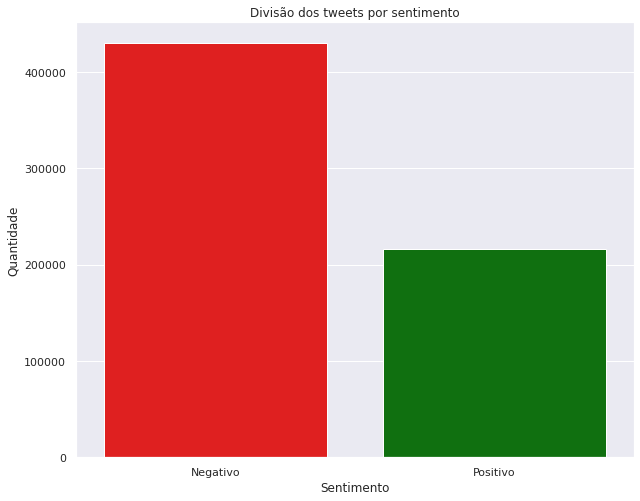

In [7]:
sentiments = formated_df["sentiment"].value_counts()
sns.set(rc={"figure.figsize": (10, 8)})
sns.barplot(
    x=sentiments.index,
    y=sentiments.values,
    palette={"Positivo": "green", "Negativo": "red"},
)
plt.xlabel("Sentimento")
plt.ylabel("Quantidade")
plt.title("Divisão dos tweets por sentimento")

plt.show()


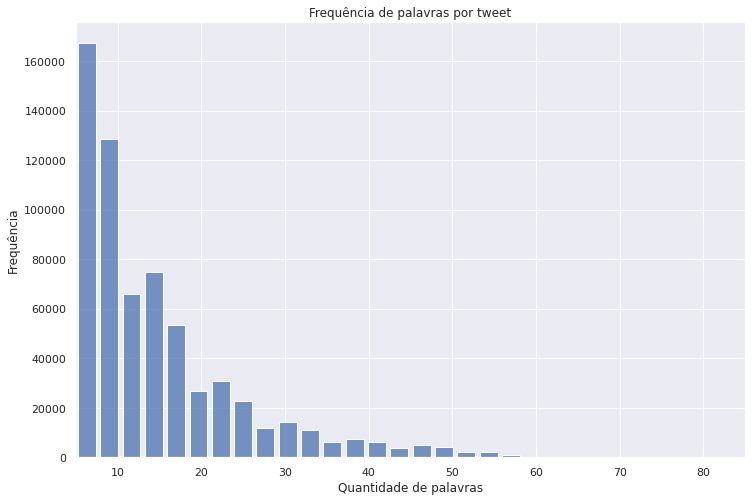

In [8]:
sns.set(rc={"figure.figsize": (12, 8)})
sns.histplot(data=formated_df, x="number_words", bins=30, shrink=0.8)

plt.xlabel("Quantidade de palavras")
plt.ylabel("Frequência")
plt.title("Frequência de palavras por tweet")
plt.xlim(formated_df.number_words.min(), formated_df.number_words.max())
plt.show()


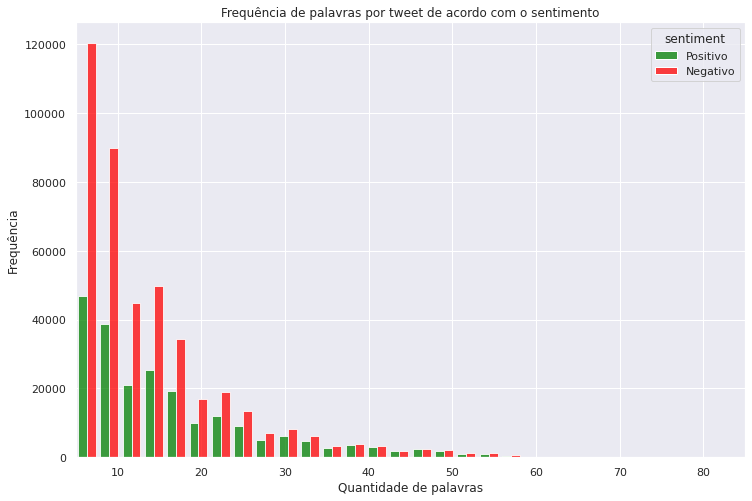

In [9]:
sns.set(rc={"figure.figsize": (12, 8)})
sns.histplot(
    data=formated_df,
    x="number_words",
    hue="sentiment",
    bins=30,
    palette={"Positivo": "green", "Negativo": "red"},
    multiple="dodge",
    shrink=0.8,
)
plt.xlabel("Quantidade de palavras")
plt.ylabel("Frequência")
plt.title("Frequência de palavras por tweet de acordo com o sentimento")
plt.xlim(formated_df.number_words.min(), formated_df.number_words.max())
plt.show()


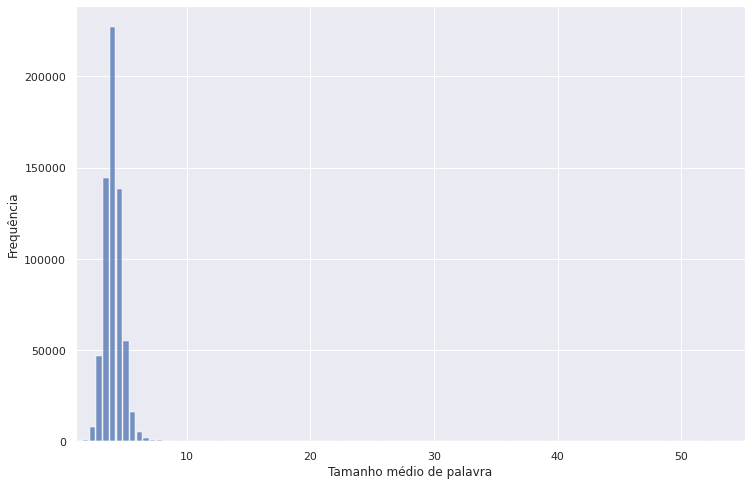

In [10]:
sns.set(rc={"figure.figsize": (12, 8)})

sns.histplot(data=formated_df, x="avg_word_length", bins=100, shrink=0.8)
plt.xlabel("Tamanho médio de palavra")
plt.ylabel("Frequência")
plt.xlim(formated_df["avg_word_length"].min(), formated_df["avg_word_length"].max())
plt.show()


In [11]:
df_positivo = formated_df.query("sentiment == 'Positivo'")
df_negativo = formated_df.query("sentiment == 'Negativo'")
df_all = formated_df

positive_text = " ".join(df_positivo.tweet_text)
negative_text = " ".join(df_negativo.tweet_text)
all_text = " ".join(df_all.tweet_text)

# positive_filter = remover_stop_words(positive_text)
# negative_filter = remover_stop_words(negative_text)


In [12]:
formated_df = formated_df.assign(
    day_period=formated_df.tweet_date.apply(
        lambda x: datetime_to_period(datetime_to_hour(x))
    )
)

formated_df


,tweet_text,tweet_date,sentiment,number_words,avg_word_length,day_period
0,14 para eu ir :),Tue Aug 21 04:35:39 +0000 2018,Positivo,5,2.400000,overnight
1,o meu like eu já dei na época :),Tue Aug 21 04:32:55 +0000 2018,Positivo,9,2.666667,overnight
2,eu só queria conseguir comer alguma coisa pra ...,Tue Aug 21 04:32:37 +0000 2018,Positivo,11,4.636364,overnight
3,:d que lindo dia !,Tue Aug 21 04:32:33 +0000 2018,Positivo,5,2.800000,overnight
4,"pq da pr jeito!!é uma ""oferta"", ha q aproveita...",Tue Aug 21 04:32:21 +0000 2018,Positivo,10,4.100000,overnight
...,...,...,...,...,...,...
785809,acordar 8 horas é tão bom :),Fri Oct 12 11:10:01 +0000 2018,Positivo,7,3.142857,morning
785810,"olá, mayck você já é cliente claro? caso não s...",Fri Oct 12 11:16:02 +0000 2018,Positivo,29,3.931034,morning
785811,opa tava na merda mm e fiquei logo mais feliz ...,Fri Oct 12 11:12:49 +0000 2018,Positivo,15,3.666667,morning
785812,foi como a tua lealdade :),Fri Oct 12 11:11:24 +0000 2018,Positivo,6,3.500000,morning


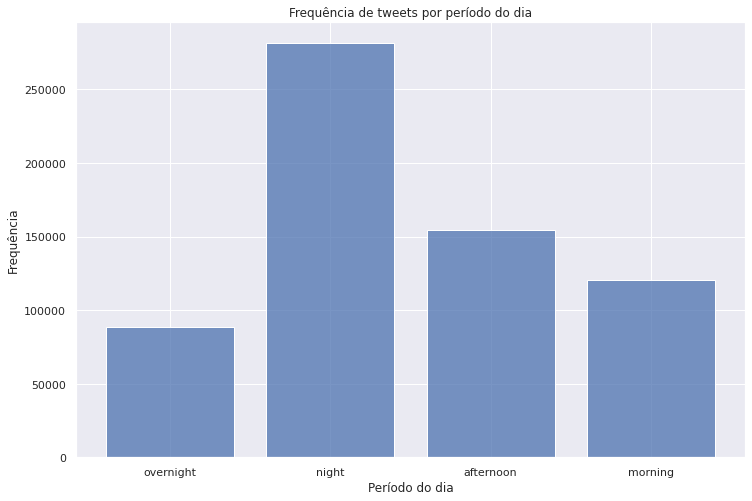

In [13]:
sns.histplot(data=formated_df, x="day_period", bins=5, shrink=0.8)
plt.xlabel("Período do dia")
plt.ylabel("Frequência")
plt.title("Frequência de tweets por período do dia")
plt.show()


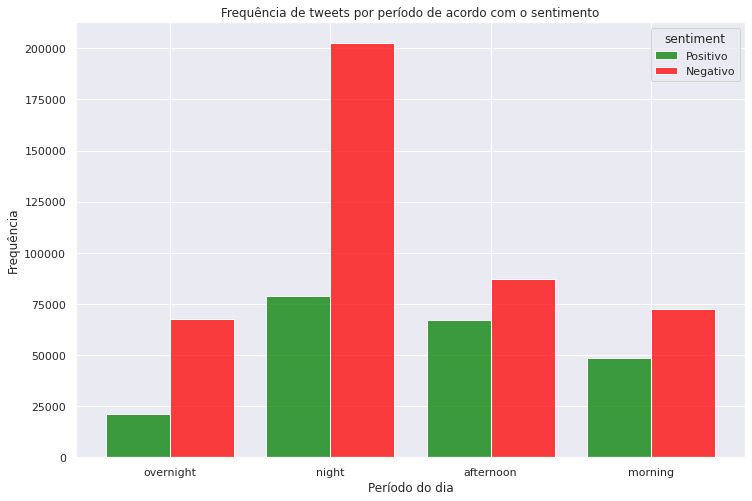

In [14]:
sns.histplot(
    data=formated_df,
    x="day_period",
    hue="sentiment",
    bins=5,
    palette={"Positivo": "green", "Negativo": "red"},
    multiple="dodge",
    shrink=0.8,
)
plt.xlabel("Período do dia")
plt.ylabel("Frequência")
plt.title("Frequência de tweets por período de acordo com o sentimento")
plt.show()


In [15]:
formated_df


,tweet_text,tweet_date,sentiment,number_words,avg_word_length,day_period
0,14 para eu ir :),Tue Aug 21 04:35:39 +0000 2018,Positivo,5,2.400000,overnight
1,o meu like eu já dei na época :),Tue Aug 21 04:32:55 +0000 2018,Positivo,9,2.666667,overnight
2,eu só queria conseguir comer alguma coisa pra ...,Tue Aug 21 04:32:37 +0000 2018,Positivo,11,4.636364,overnight
3,:d que lindo dia !,Tue Aug 21 04:32:33 +0000 2018,Positivo,5,2.800000,overnight
4,"pq da pr jeito!!é uma ""oferta"", ha q aproveita...",Tue Aug 21 04:32:21 +0000 2018,Positivo,10,4.100000,overnight
...,...,...,...,...,...,...
785809,acordar 8 horas é tão bom :),Fri Oct 12 11:10:01 +0000 2018,Positivo,7,3.142857,morning
785810,"olá, mayck você já é cliente claro? caso não s...",Fri Oct 12 11:16:02 +0000 2018,Positivo,29,3.931034,morning
785811,opa tava na merda mm e fiquei logo mais feliz ...,Fri Oct 12 11:12:49 +0000 2018,Positivo,15,3.666667,morning
785812,foi como a tua lealdade :),Fri Oct 12 11:11:24 +0000 2018,Positivo,6,3.500000,morning


analyzed stopwords:
 ['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivesse

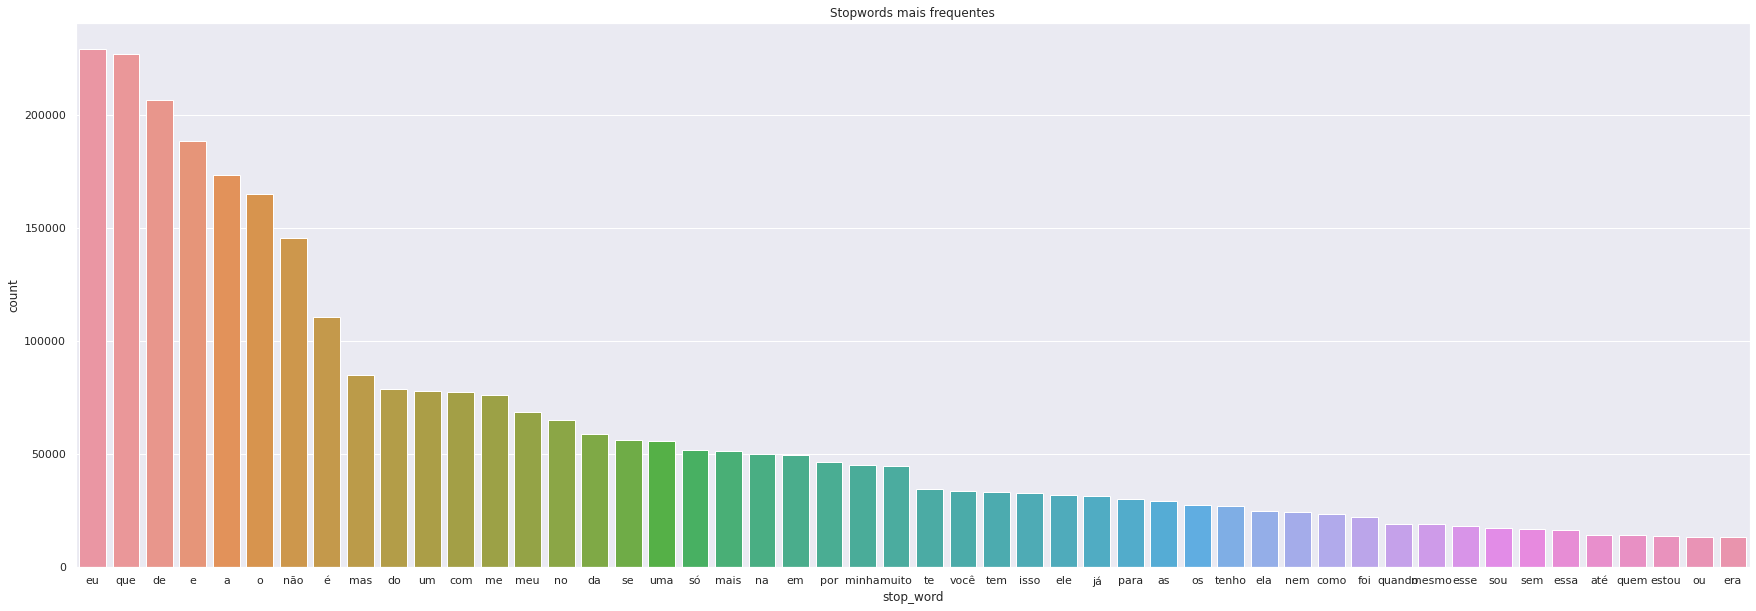

In [16]:
from collections import defaultdict

dic = defaultdict(int)

stopwords = nltk.corpus.stopwords.words("portuguese")

print("analyzed stopwords:\n", stopwords)


for word in (all_text).split():
    if word in stopwords:
        dic[word] += 1


top = sorted(dic.items(), key=lambda x: x[1], reverse=True)[:50]  # top 50 stopwords


stopwords_df = pd.DataFrame(top, columns=["stop_word", "count"])


sns.set(rc={"figure.figsize": (30, 10)})
sns.barplot(x="stop_word", y="count", data=stopwords_df)
plt.title("Stopwords mais frequentes")
plt.show()


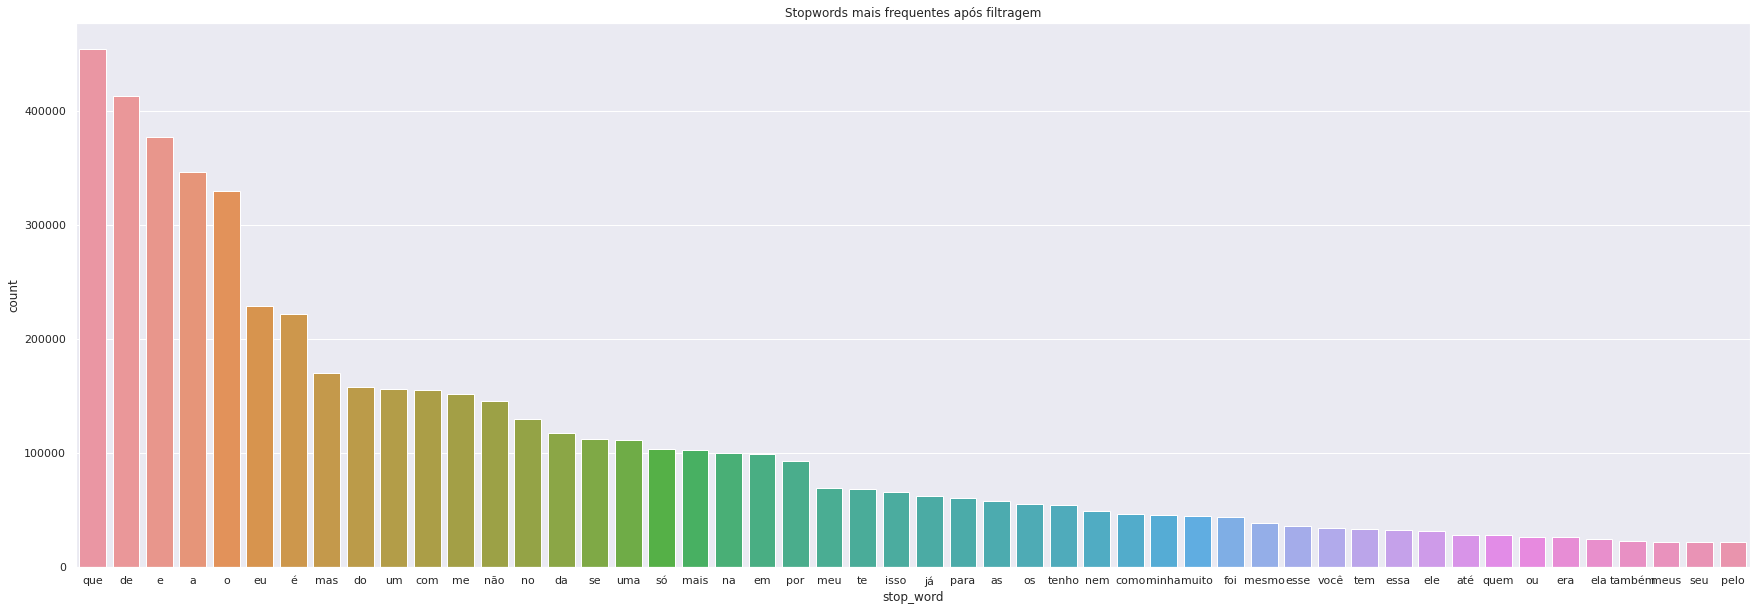

In [17]:
relevant_stop_words = [
    "eu",
    "não",
    "meu",
    "minha",
    "muito",
    "você",
    "tem",
    "ele",
    "ela",
    "quando",
    "sou",
    "você",
    "sem",
    "estou",
]  # stopwords consideradas relevantes para análise de sentimento, serão mantinidas em todo o processo de análise
stopwords = list(
    filter(lambda x: x not in relevant_stop_words, stopwords)
)  # remove do conjunto de stopwords palavras que não serão consideradas para filtragem

for word in all_text.split():
    if word in stopwords:
        dic[word] += 1

top = sorted(dic.items(), key=lambda x: x[1], reverse=True)[:50]  # top 50 stopwords


stopwords_df = pd.DataFrame(top, columns=["stop_word", "count"])


sns.set(rc={"figure.figsize": (30, 10)})
sns.barplot(x="stop_word", y="count", data=stopwords_df)
plt.title("Stopwords mais frequentes após filtragem")
plt.show()


In [18]:
from collections import Counter


counter = Counter(all_text.split())
most = counter.most_common(80)
print(most)
print(len(most))

x, y = [], []
for word, count in most:
    if word not in stopwords:
        x.append(word)
        y.append(count)


[(':(', 349885), ('eu', 229051), ('que', 227046), ('de', 206458), ('e', 188375), ('a', 173204), ('o', 164955), (':)', 147926), ('não', 145389), ('é', 110706), ('mas', 84999), ('do', 78792), ('um', 77857), ('com', 77444), ('pra', 76035), ('me', 75861), ('meu', 68694), ('no', 64818), ('da', 58698), ('se', 56063), ('uma', 55691), ('só', 51582), ('mais', 51346), ('na', 49762), ('q', 49730), ('em', 49494), ('por', 46291), ('minha', 45215), ('muito', 44550), ('queria', 43257), ('to', 39204), ('vou', 38474), ('te', 34210), ('você', 33736), ('tem', 33034), ('isso', 32783), (':((', 31801), ('ele', 31787), ('vai', 31773), ('já', 31217), ('para', 30164), ('vc', 29319), ('as', 29073), ('n', 27928), ('os', 27525), ('ter', 27430), ('tenho', 26901), ('pq', 26414), ('ser', 25997), ('tá', 24852), ('ela', 24778), (':d', 24374), ('dia', 24291), ('nem', 24266), ('bem', 24045), ('triste', 23468), ('como', 23334), ('tão', 22820), ('tô', 22125), ('ver', 21923), ('amo', 21895), ('foi', 21862), ('tudo', 21329)

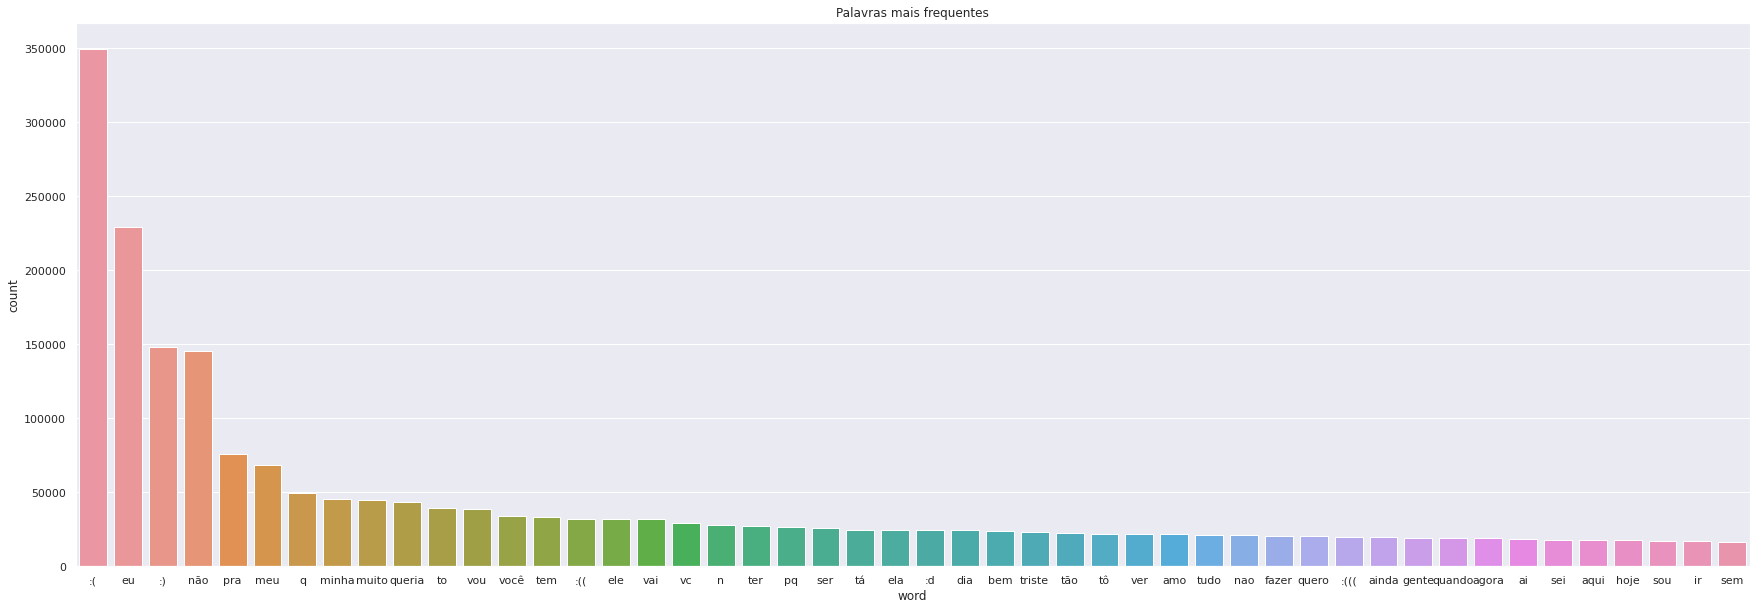

In [19]:
most_common_words = list(zip(x, y))

most_common_words_df = pd.DataFrame(
    most_common_words, columns=["word", "count"]
)  # palavras


most_common_words_df

sns.set(rc={"figure.figsize": (30, 10)})
sns.barplot(x="word", y="count", data=most_common_words_df)
plt.title("Palavras mais frequentes")
plt.show()


In [28]:
print(len(stopwords))
invalid_terms = [
    ":p", #indentificava apenas como "p"
    ":d", # indentificava apenas como "d"
    "(",
    "pra",
    "q",
    "_",
    "((",
    "pq",
    "ai",
]  # palavras inrelevantes para análise de sentimento, ou termos abreviados já contidos em stopwords

stopwords.extend(invalid_terms)

print(len(stopwords))


counter = Counter(all_text.split())
most = counter.most_common(80)
print(most)
print(len(most))

x, y = [], []
for word, count in most:
    if word not in stopwords:
        x.append(word)
        y.append(count)


208
217
[(':(', 349885), ('eu', 229051), ('que', 227046), ('de', 206458), ('e', 188375), ('a', 173204), ('o', 164955), (':)', 147926), ('não', 145389), ('é', 110706), ('mas', 84999), ('do', 78792), ('um', 77857), ('com', 77444), ('pra', 76035), ('me', 75861), ('meu', 68694), ('no', 64818), ('da', 58698), ('se', 56063), ('uma', 55691), ('só', 51582), ('mais', 51346), ('na', 49762), ('q', 49730), ('em', 49494), ('por', 46291), ('minha', 45215), ('muito', 44550), ('queria', 43257), ('to', 39204), ('vou', 38474), ('te', 34210), ('você', 33736), ('tem', 33034), ('isso', 32783), (':((', 31801), ('ele', 31787), ('vai', 31773), ('já', 31217), ('para', 30164), ('vc', 29319), ('as', 29073), ('n', 27928), ('os', 27525), ('ter', 27430), ('tenho', 26901), ('pq', 26414), ('ser', 25997), ('tá', 24852), ('ela', 24778), (':d', 24374), ('dia', 24291), ('nem', 24266), ('bem', 24045), ('triste', 23468), ('como', 23334), ('tão', 22820), ('tô', 22125), ('ver', 21923), ('amo', 21895), ('foi', 21862), ('tudo'

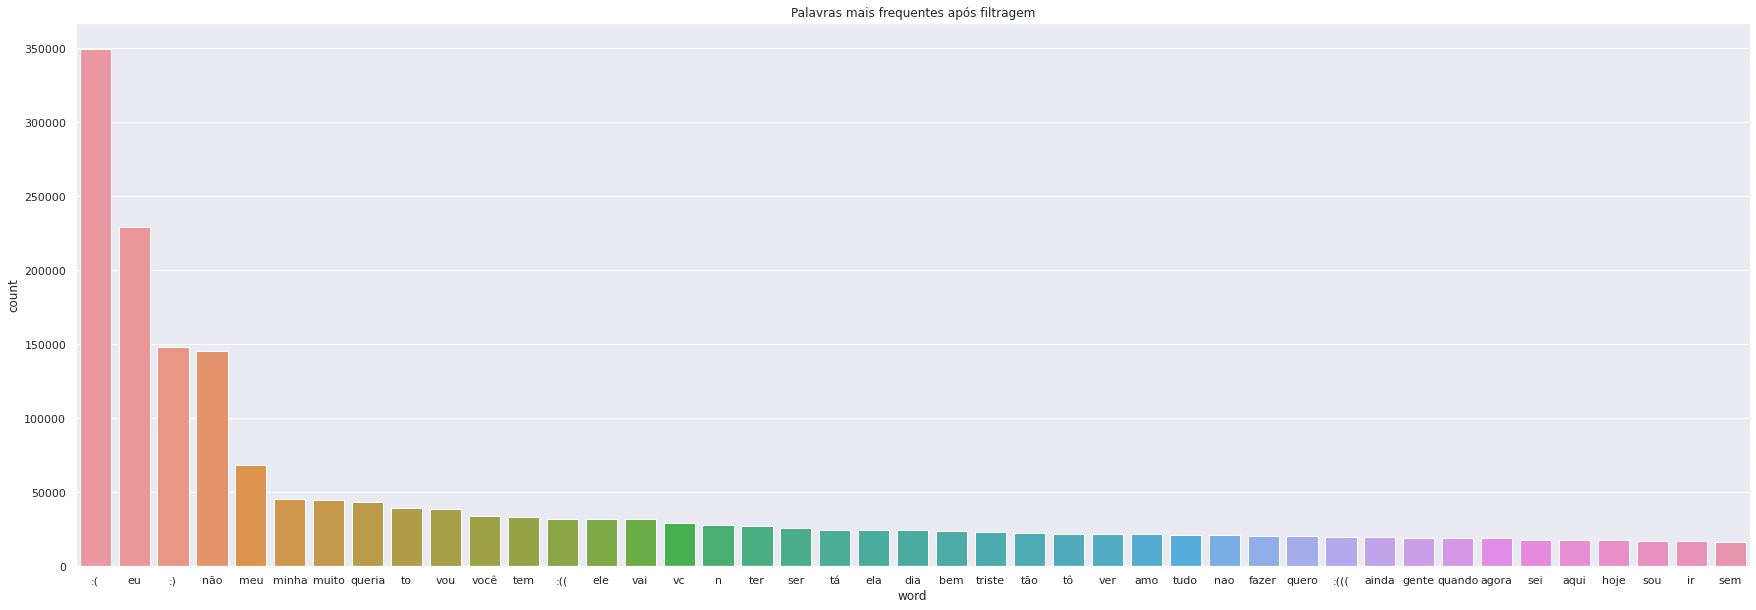

In [29]:
most_common_words_filtered = list(zip(x, y))

most_common_words_filtered_df = pd.DataFrame(
    most_common_words_filtered, columns=["word", "count"]
)


sns.set(rc={"figure.figsize": (30, 10)})
sns.barplot(x="word", y="count", data=most_common_words_filtered_df)
plt.title("Palavras mais frequentes após filtragem")
plt.show()


In [30]:
final_stop_words = stopwords

print((stopwords))

positive_filter = remover_stop_words(positive_text, final_stop_words)
negative_filter = remover_stop_words(negative_text, final_stop_words)
all_text_filter = remover_stop_words(all_text, final_stop_words)


['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'das', 'à', 'seu', 'sua', 'ou', 'nos', 'já', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'entre', 'depois', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'essa', 'num', 'nem', 'suas', 'às', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estivermos', 'estiverem', 'hei', 'há', 'havemos', 'hão', 'houve', 'houvemos', 'houveram', '

In [31]:
print(final_stop_words)


['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'das', 'à', 'seu', 'sua', 'ou', 'nos', 'já', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'entre', 'depois', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'essa', 'num', 'nem', 'suas', 'às', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estivermos', 'estiverem', 'hei', 'há', 'havemos', 'hão', 'houve', 'houvemos', 'houveram', '

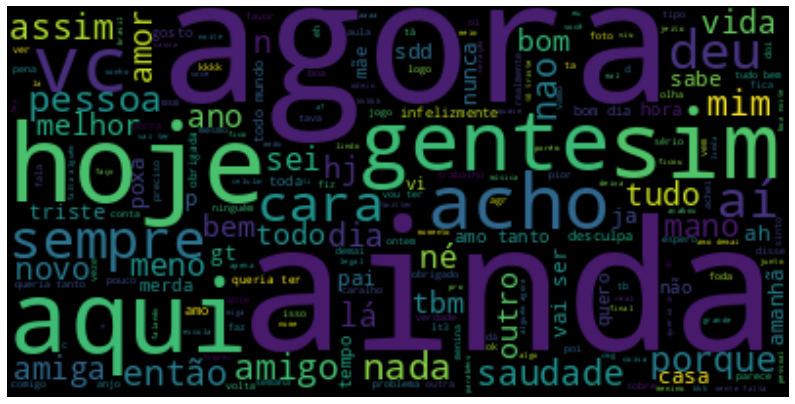

In [24]:
wordcloud = WordCloud().generate(all_text_filter)
plt.figure(figsize=(14, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


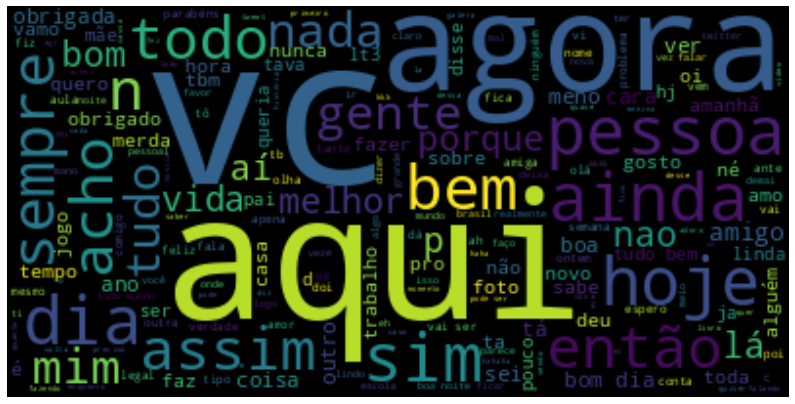

In [25]:
# Generate a word cloud image
wordcloud = WordCloud().generate(positive_filter)
plt.figure(figsize=(14, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


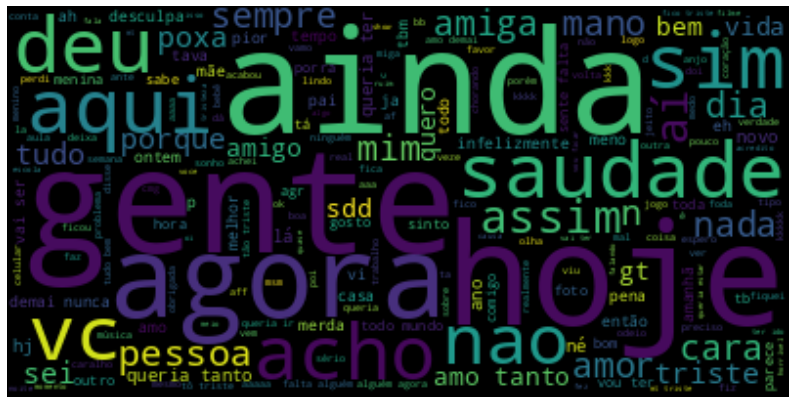

In [26]:
wordcloud = WordCloud().generate(negative_filter)
plt.figure(figsize=(14, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


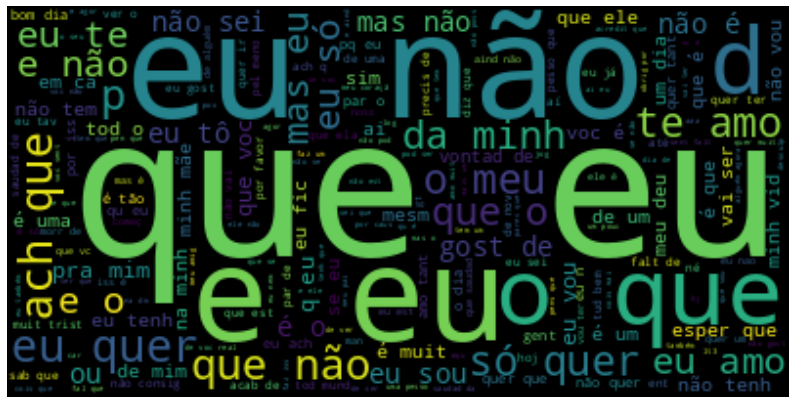

In [32]:
wordcloud = WordCloud().generate(stemming(all_text))
plt.figure(figsize=(14, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


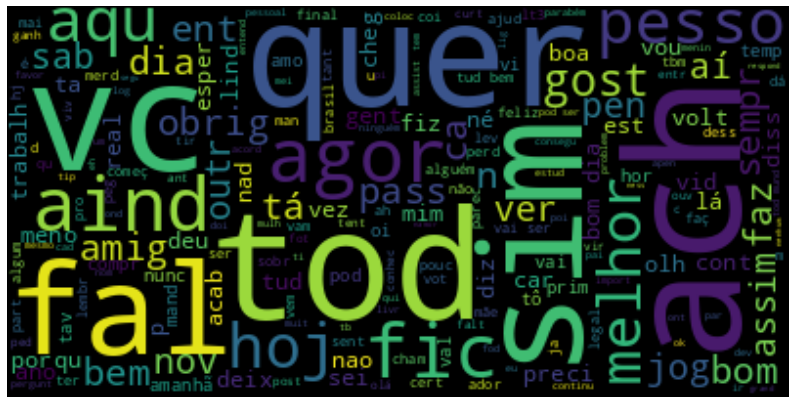

In [33]:
wordcloud = WordCloud().generate(stemming(positive_filter))
plt.figure(figsize=(14, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [34]:
wordcloud = WordCloud().generate(stemming(negative_filter))
plt.figure(figsize=(14, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [ ]:
from nltk.util import ngrams
list(ngrams(['I' ,'went','to','the','river','bank'],2))